##### Trabajo Semanal 6

##### Estimación espectral. Ventanas en acción!

En esta tarea continuaremos con el capítulo 14 de Holton. DSP Principles and App.

Para ello, realizaremos el punto 3.a del TP2.

3) Genere la siguiente señal
x(k)=a0⋅sen(Ω1⋅k)
siendo

a0=2
Ω1=Ω0+fr⋅2πN
Ω0=π2
y la variable aleatoria definida por la siguiente distribución de probabilidad

fr∼U(−2,2)


Considere 200 realizaciones (muestras tomadas de fr) para cada ventana analizada en la TS6. Se pide entonces:

3.a) Grafique los histogramas de
|Xiw(Ω0)|


siendo

|Xiw(Ω)|=|F{x(k)⋅wi(k)}|
para la i-ésima ventana de las 5 utilizadas en la TS6. El sesgo y la varianza se definen para este caso como:

 Grafique los 5 histogramas juntos, o cuide que todos los gráficos tengan el mismo rango de valores en X para facilitar la comparación visual.
3.b) Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
a0^=|Xiw(Ω0)|
siendo

sa=E{a0^}−a0

va=var{a0^}=E{(a0^−E{a0^})2}
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales

E{a0^}=μa^=1M∑j=0M−1aj^

sa=μa^−a0

va=1M∑j=0M−1(aj^−μa^)2


Estimación de Amplitud 
 
 
sa	va
Rectangular	 	 
Bartlett	 	 
Hann	 	 
Blackman	 	 
Flat-top	 	 

Inclusión de librerías

In [2]:
# -*- coding: utf-8 -*-
"""

@author: Hugo Alejandro Gomez

Descripción:
------------
Tarea semanal N°7

"""
# Inclusión de librerías
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

Inicialización de variables

In [3]:
# Inicialización de variables
plt.close('all')
fs=1000
N = 1000
df = fs/N # resolución espectral
amp = 2
freq = fs/4
ph = 0
dc = 0
muestras = 200
omega_ini = np.pi/2
ts = 1/fs
Wbins = 1

Simulaciones

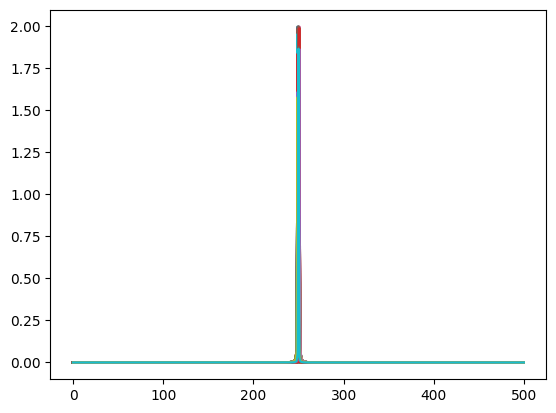

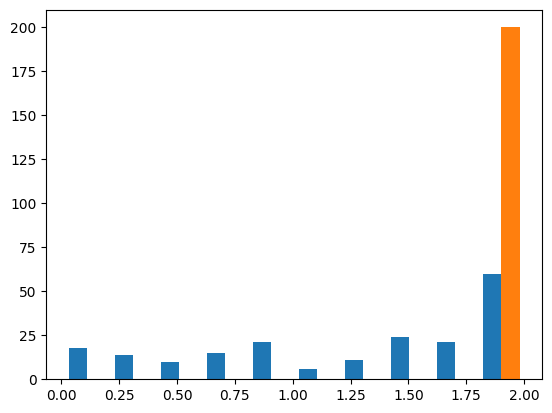

In [4]:
noise = (np.random.rand(1,muestras)-0.5)*2

tt = np.linspace(0, (N-1)*ts, N).reshape(N,1)

omega = (omega_ini + noise * (np.pi*2/N))*tt*fs

signal = amp*np.sin(omega)

#ft_signal = np.fft.fft(signal) / signal.shape[0]
ft_signal = np.fft.fft(signal, axis=0) / signal.shape[0]

ff = np.arange(0, fs, fs/N)
bfrec = ff<=(fs/2)

estimador1 = np.abs(ft_signal[250, :])*2 #[muestra 250, realizaciones todas]

densidadPotencia = 2*np.abs(ft_signal)**2
subMatriz = densidadPotencia[250-Wbins:250+Wbins+1, :]

potenciaEstimada = np.sum(subMatriz, axis=0)
amplitudEstimada = np.sqrt(2*potenciaEstimada)

estimadores = np.vstack([estimador1, amplitudEstimada]).transpose()

plt.figure(1)
#En veces
plt.plot(ff[bfrec],(2*np.abs(ft_signal[bfrec , :])**2))

#En dB
#plt.plot(ff[bfrec], 20*np.log10(2*np.abs(ft_signal[bfrec, :])**2))


#plt.figure(2)
fig, ax = plt.subplots(nrows=1, ncols=1)
#ax.hist(estimador1)
ax.hist(estimadores)

mediana = np.median(estimadores, axis=0)
sesgo = np.median(estimadores, axis=0) - amp
varianza = np.mean((estimadores - mediana)**2, axis=0)


plt.show()
